In [131]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

import matplotlib.pyplot as plt
plt.tight_layout()
import time

from IPython import display
import seaborn as sns
sns.set_style("darkgrid")


In [132]:
class FCN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 10)
        self.fc2 = nn.Linear(10, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [133]:
# Initialise the Neural Network on CPU
# two_layer_nn = FCN()

# Initialise the Neural Network on GPU
# two_layer_nn = FCN().cuda()

# Initialise the Neural Network on **MULTIPLE**GPU
two_layer_nn = nn.DataParallel(FCN().cuda())

In [134]:
# Generate a random input variable
INPUT = torch.randn(1, 10)
INPUT = Variable(INPUT)

In [135]:
OUTPUT = two_layer_nn(INPUT)
OUTPUT.data.cpu().numpy()
#Do a forward pass and obtain the result as a numpy array

array([[ 0.82554334, -0.30254018,  0.07972538,  0.20115416,  0.0406077 ,
        -0.42073125,  0.44739065, -0.09696309,  0.19662648, -0.3145022 ]],
      dtype=float32)

In [136]:
# Define a loss function
loss_fn = torch.nn.MSELoss(size_average=False)

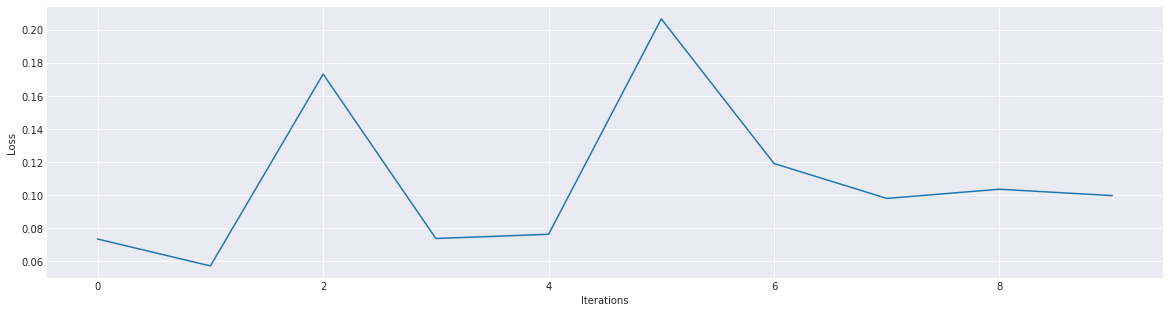

In [140]:
learning_rate = 1e-4
history = []

for t in range(100):
    INPUT = torch.randn(1, 10)
    INPUT = Variable(INPUT).cuda()
    
#     OUTPUT_TRUE = torch.randn(1, 3)
#     OUTPUT_TRUE = Variable(OUTPUT_TRUE)
    
    """
     Case when output is related to the Input ?
    """
    OUTPUT_TRUE = 0.1 * INPUT

    
    output_predicted = two_layer_nn(INPUT)

    loss = loss_fn(output_predicted, OUTPUT_TRUE)
    if(t % 10 == 0):
        #print("Iteration {} :: Loss :: {}".format(t, loss.data[0]))
        """
         Collect history and plot
        """
        history.append(loss.data[0])
        
        # Plot History
        #f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20,5))
        f, ax1 = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(20,5))
        ax1.set_xlabel("Iterations")
        ax1.set_ylabel("Loss")
        ax1.plot(history)
        
        """
        # Plot features
        for _idx, param in enumerate(two_layer_nn.parameters()):
            if _idx == 2:
                sns.heatmap(param.data.cpu().numpy(), ax=ax2)
                break
        """

            
        display.clear_output(wait=True)        
        plt.show()
        
        
    two_layer_nn.zero_grad()
    
    loss.backward()
    
    for param in two_layer_nn.parameters():
        param.data -= learning_rate * param.grad.data
